In [64]:
import os
import shutil
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader, ConcatDataset, random_split
from torchvision import transforms,utils,models
import matplotlib.pyplot as plt

# 1.MyData数据模块
class MyData(Dataset):

    """
    root_dir：包含训练集train、测试集test的总目录路径
    mode：选哪一个数据集？train或test
    label：选猫猫(1)或狗狗(0)
    flag：1表示需要划分数据集（train, test）；0表示不需要划分数据集，注意仅用一次!
    """

    def __init__(self, root_dir, mode, label, flag=0): # 初始化数据集及成员root_dir、mode、label
        self.root_dir = root_dir
        self.mode = mode
        self.label = label
        if flag==1:
            # 将Cats数据集中的猫猫图片移动到train/cats、test/cats中，比例分别为8:2
            # 创建文件夹
            if not os.path.exists(root_dir+'\\train\\cats'):
                os.makedirs(os.path.join(root_dir,'train\\cats'))
            if not os.path.exists(root_dir+'\\test\\cats'):
                os.makedirs(os.path.join(root_dir,'test\\cats'))

            # 分割train, test
            cats_path = os.listdir(os.path.join(root_dir,'Cats')) # 获取猫猫图片地址
            num_cats = len(cats_path)
            train_cats, test_cats = random_split(
                dataset = cats_path,
                lengths = [int(num_cats*0.8), num_cats-int(num_cats*0.8)])

            # 移动文件，并删除原Cats文件夹
            for i in list(train_cats):
                shutil.move(os.path.join(root_dir, 'Cats', i), os.path.join(root_dir,'train\\cats'))
            for i in list(test_cats):
                shutil.move(os.path.join(root_dir, 'Cats', i), os.path.join(root_dir,'test\\cats'))  
            os.rmdir(os.path.join(root_dir,'Cats'))

            # 将Dogs数据集中的狗狗图片移动到train/dogs、test/dogs中，比例分别为8:2
            # 创建文件夹
            if not os.path.exists(root_dir+'\\train\\dogs'):
                os.makedirs(os.path.join(root_dir,'train\\dogs'))
            if not os.path.exists(root_dir+'\\test\\dogs'):
                os.makedirs(os.path.join(root_dir,'test\\dogs'))

            # 分割train, test
            dogs_path = os.listdir(os.path.join(root_dir,'Dogs')) # 获取狗狗图片地址
            num_dogs = len(dogs_path)
            train_dogs, test_dogs = random_split(
                dataset = dogs_path,
                lengths = [int(num_dogs*0.8), num_dogs-int(num_dogs*0.8)])

            # 移动文件，并删除原Dogs文件夹
            for j in list(train_dogs):
                shutil.move(os.path.join(root_dir, 'Dogs', j), os.path.join(root_dir,'train\\dogs'))
            for j in list(test_dogs):
                shutil.move(os.path.join(root_dir, 'Dogs', j), os.path.join(root_dir,'test\\dogs'))  
            os.rmdir(os.path.join(root_dir,'Dogs'))

        self.img_path = os.listdir(os.path.join(root_dir, mode, label)) # 获取所有图片数据名称
        
    def __len__(self): # 获取图片数据size
        return len(self.img_path)
    
    def __getitem__(self, index): # 获取指定图片数据及名称
        img_item_name = self.img_path[index]
        img_item_path = os.path.join(self.root_dir, self.mode, self.label, img_item_name)
        img = Image.open(img_item_path).convert('RGB')
        transform = transforms.Compose([  # 图像变换
                    transforms.Resize((224, 224)),
                    transforms.ColorJitter(),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                ])
        img = transform(img)
        if img_item_name[:3]=='cat':
            img_item_name = 1
        else:
            img_item_name = 0
        return img, img_item_name

tensor(1)	tensor(1)	tensor(1)	tensor(1)	tensor(1)	tensor(1)
tensor(1)	tensor(1)	tensor(1)	tensor(1)	tensor(1)	tensor(1)
tensor(1)	tensor(1)	tensor(1)	tensor(1)	tensor(1)	tensor(1)
tensor(1)	tensor(1)	tensor(1)	tensor(1)	tensor(1)	tensor(1)
tensor(1)	tensor(1)	tensor(1)	tensor(1)	tensor(1)	tensor(1)


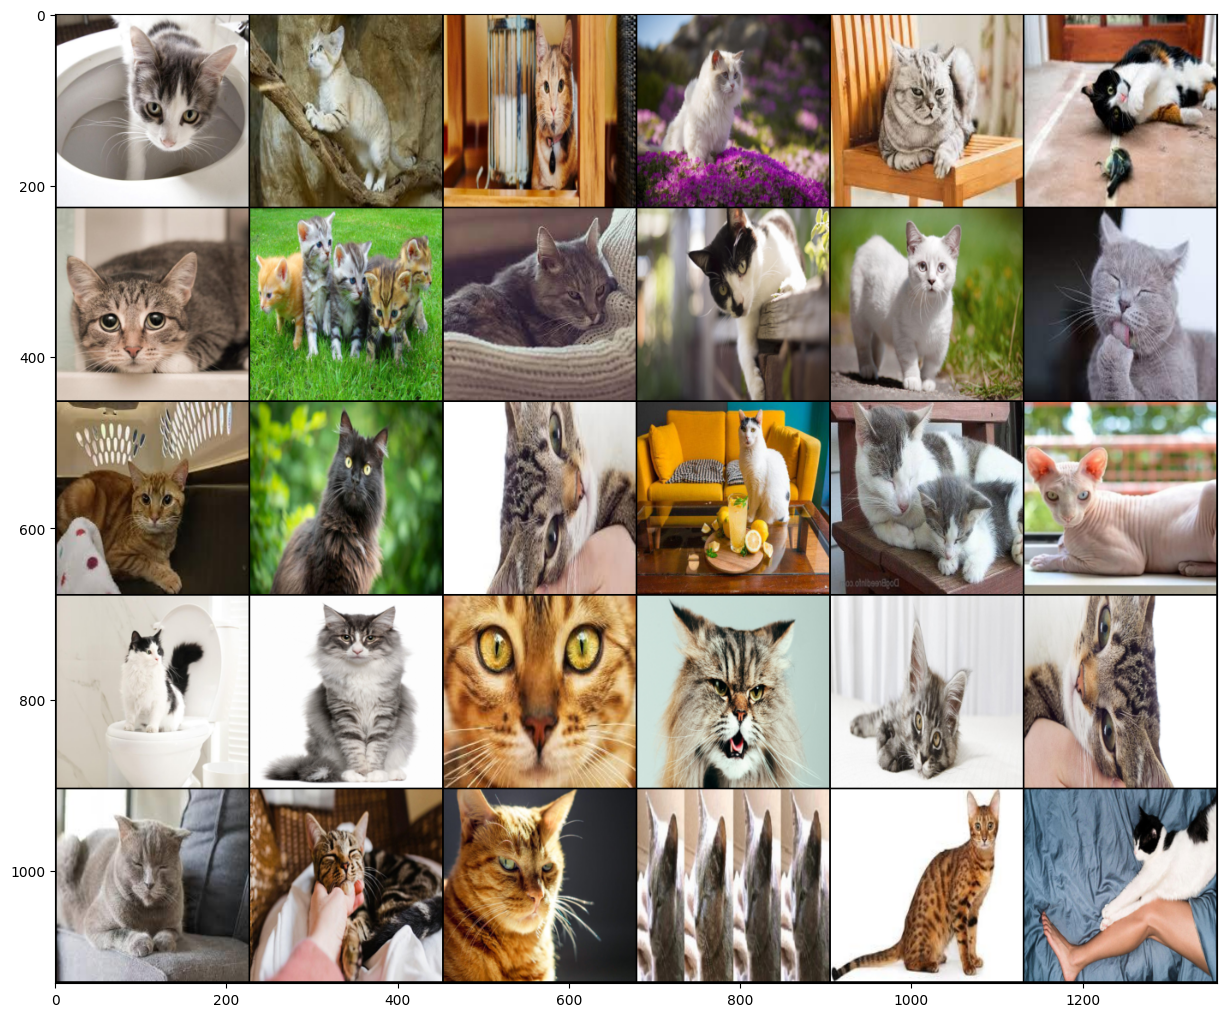

In [65]:
# 数据预览
root_dir = 'C:\\Users\\XGQ\\Desktop\\Programs\\Python\\Python程序\\Learning\\Deep Learning\\Data\\Cats and Dogs'
mode = 'train'
label = 'cats'
train_cats_dataset = MyData(root_dir, 'train', 'cats', flag=0)

loader = DataLoader(train_cats_dataset, batch_size=30, shuffle=True , num_workers=0, drop_last=False) # 将全部图片随机加载为30个一组的图片数据（不采取多线程加载，不丢弃剩余数据）
batch  = next(iter(loader)) # 取第一组图片数据
imgs,labels = batch # 取图片及标签

grid = utils.make_grid(imgs,nrow=6) # 设置一个布局，将images中的图像按一行6个拼接输出
plt.figure(figsize=(15,15)) # 设置画布大小
plt.imshow(np.transpose(grid,(1,2,0))) # 调换图像各阶数据，将通道信息放在最后，便于显示
for i in range(30): # 输出标签，6个为一行
    if (i+1)%6!=0:
        print(labels[i],end="\t")
    else:
        print(labels[i],end="\n")

In [66]:
# 加载数据
# 训练数据集
train_cats_dataset = MyData(root_dir, 'train', 'cats', flag=0)
train_dogs_dataset = MyData(root_dir, 'train', 'dogs', flag=0)
train_dataset = ConcatDataset([train_cats_dataset, train_dogs_dataset]) # 合并猫狗数据集

# 测试数据集
test_cats_dataset = MyData(root_dir, 'test', 'cats', flag=0)
test_dogs_dataset = MyData(root_dir, 'test', 'dogs', flag=0)
test_dataset = ConcatDataset([test_cats_dataset, test_dogs_dataset])

# 加载数据
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True, num_workers=0)
test_loader = DataLoader(dataset=test_dataset, batch_size=8, shuffle=False, num_workers=0)

In [ ]:
# 构建并训练模型
import time
import torch
import torchvision

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 训练是否使用GPU

model = torchvision.models.resnet50(weights="DEFAULT") # 加载预训练模型
model.to(device) 

lossfn = torch.nn.CrossEntropyLoss() # 定义损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # 定义损失函数优化算法（随机梯度下降法）